2.0.0
2.2.4-tf
4.1.2
train data= 60000
 test data= 10000
train data= (60000, 28, 28)
 test data= (10000, 28, 28)


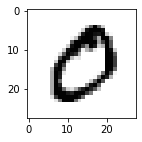

0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.1918 - accuracy: 0.9405
Epoch 2/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0571 - accuracy: 0.9819
Epoch 3/10
60000/60000 [==============================] - 148s 2ms/sample - loss: 0.0376 - accuracy: 0.9883
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.0302 - accuracy: 0.9908
Epoch 5/10
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.0222 - accuracy: 0.9926
Epoch 6/10
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0193 - accuracy: 0.9938
Epoch 7/10
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0164 - accuracy: 0.9943
Epoch 8/10
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0143 - accuracy: 0.9951
Epoch 9/10
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0130 - accuracy: 0.9955
Epo

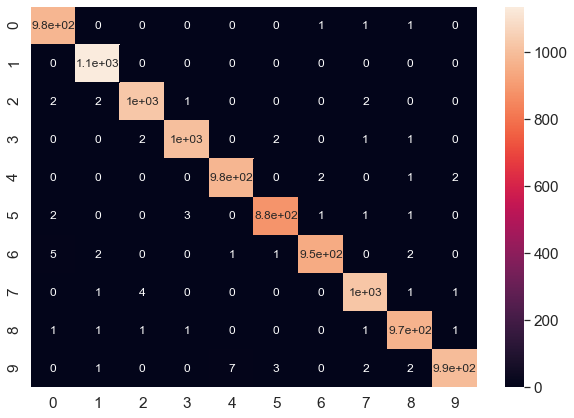

[3 7 2 5 3 5 3 7 3 2]
sum= 0.3


In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor
"""
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sn 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sb         # 一个构建在matplotlib上的绘画模块，支持numpy,pandas等数据结构
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix     # 混淆矩阵
from tensorflow.keras.utils import to_categorical
import itertools
np.random.seed(10)

def to_categorical(y, num_classes=None):
    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes))
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

print(tf.__version__)
print(tf.keras.__version__)
print(cv2.__version__)

(X_train_image,y_train_label),(X_test_image,y_test_label)=mnist.load_data()

print('train data=',len(X_train_image))
print(' test data=',len(X_test_image))
print('train data=',X_train_image.shape)
print(' test data=',X_test_image.shape)

def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.show()

plot_image(X_train_image[1])
print(y_train_label[1])

#x_Train=X_train_image.reshape(60000,784).astype('float32')
#x_Test =X_test_image.reshape(10000,784).astype('float32')

x_Train=X_train_image.reshape(60000,28,28,1).astype('float32')
x_Test =X_test_image.reshape(10000,28,28,1).astype('float32')


x_Train_normalize=x_Train/255.0
x_Test_normalize=x_Test/255.0


y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)

y_TrainOneHot=to_categorical(y_train_label,10)
y_TestOneHot=to_categorical(y_test_label,10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()
# 第一个卷积层，32个卷积核，大小５x5，卷积模式SAME,激活函数relu,输入张量的大小
model.add(Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu'))
# 池化层,池化核大小２x2
model.add(MaxPool2D(pool_size=(2,2)))
# 随机丢弃四分之一的网络连接，防止过拟合
model.add(Dropout(0.25))  

'''
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

'''

# 全连接层,展开操作，
model.add(Flatten())
# 添加隐藏层神经元的数量和激活函数
model.add(Dense(256, activation='relu'))    
model.add(Dropout(0.25))
# 输出层
model.add(Dense(10, activation='softmax'))
# 设置优化器
# lr :学习效率，　decay :lr的衰减值
#optimizer = RMSprop(lr = 0.001, decay=0.0)

#data_augment = ImageDataGenerator(rotation_range= 10,zoom_range= 0.1,
#                                  width_shift_range = 0.1,height_shift_range = 0.1,
#                                  horizontal_flip = False, vertical_flip = False)

epochs = 40
batch_size = 100

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=x_Train_normalize,y=y_train,epochs = 10,batch_size = 200)
#model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
score = model.evaluate(x_Test_normalize,y_test,verbose = 0)

print(score[1]*100)
prediction=model.predict_classes(x_Test)
pred=model.predict(x_Test)
'''
model=Sequential()
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu')) 
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax')) 
print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
#scores=model.evaluate(x_Test_normalize,y_TestOneHot)

#print ('accuracy=',scores[1])
prediction=model.predict_classes(x_Test)
pred=model.predict(x_Test)
'''

pd.crosstab(y_test_label,prediction,rownames=['labels'],colnames=['predict'])
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
'''
    把原始的数据其标签和实际预测不同的给标记出来,绘制交叉混淆矩阵图形
'''
#把原始的数据其标签和实际预测不同的给标记出来，同时记录在林大贵著的书中
n_classes=10
def DrawingConfusionMatrix(y_test,scnn_predicted,n_classes):
    #scnn_cm = confusion_matrix(np.argmax(y_test, axis=1), scnn_predicted)
    scnn_cm = confusion_matrix(y_test,scnn_predicted)
    scnn_df_cm = pd.DataFrame(scnn_cm, range(n_classes), range(n_classes))
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4) 
    sn.heatmap(scnn_df_cm, annot=True, annot_kws={"size": 12}) # font size
    plt.show()
    return

DrawingConfusionMatrix(y_test_label, prediction,n_classes)

'''
    测试方案第1种：预测集中共10张图片，把这10张图片读进来，然后组织成一个数组
'''
def imgtobin(im):
    for i in range(0,28):
        for j in range(0,28):
            if im[i][j]>128:
                im[i][j]=0
            else:
                im[i][j]=255
    return im

imaglist=[]
idx=0
for i in range(10):
    filename='..\\ims\\%s.png'%idx
    #print(cv2.imread(filename,0))
    res=cv2.resize(cv2.imread(filename,0),(28,28))
    #res=imgtobin(res).reshape(-1)
    imaglist.append(res)
    idx+=1
testimg=np.array(imaglist)
testing =testimg.reshape(testimg.shape[0],28,28,1).astype('float32')

#testing=testimg.astype('float32')
testingNorm=testing/255.0
result=model.predict_classes(testingNorm)
print(result)

sum = 0
for i in range(0,len(result)):
    if result[i] == i:
        sum += 1
sum /= len(result)

print("sum=", sum)




In [17]:
imaglist=[]
idx=0
for i in range(10):
    filename='..\\ims\\%s.png'%idx
    #print(cv2.imread(filename,0))
    res=cv2.resize(cv2.imread(filename,0),(28,28))
    res=imgtobin(res)
    imaglist.append(res)
    #print(imaglist)
    idx+=1
testimg=np.array(imaglist)
testing =testimg.reshape(testimg.shape[0],28,28,1).astype('float32')
#print(x_Train_normalize)
#testing=testimg.astype('float32')
testingNorm=testing/255.0
result=model.predict_classes(testingNorm)
print(result)

sum = 0
for i in range(0,len(result)):
    if result[i] == i:
        sum += 1
sum /= len(result)

print("sum=", sum)



[0 1 2 3 4 5 6 7 8 9]
sum= 1.0


In [19]:
import os


print("===获取当前文件目录===")
# 当前脚本工作的目录路径
print(os.getcwd())
# os.path.abspath()获得绝对路径



===获取当前文件目录===
C:\Users\ZLT\Desktop\11115\手写识别TF2.0\手写识别TF2.0\src


In [20]:
imaglist=[]
idx=0
for i in range(10):
    filename='..\\imgs\\%s.png'%idx
    #print(cv2.imread(filename,0))
    res=cv2.resize(cv2.imread(filename,0),(28,28))
    res=imgtobin(res)
    imaglist.append(res)
    #print(imaglist)
    idx+=1
testimg=np.array(imaglist)
testing =testimg.reshape(testimg.shape[0],28,28,1).astype('float32')
#print(x_Train_normalize)
#testing=testimg.astype('float32')
testingNorm=testing/255.0
result=model.predict_classes(testingNorm)
print(result)

sum = 0
for i in range(0,len(result)):
    if result[i] == i:
        sum += 1
sum /= len(result)

print("sum=", sum)



[3 1 2 3 4 5 8 2 3 1]
sum= 0.5


In [26]:
imaglist=[]
idx=0
for i in range(20):
    filename='..\\img\\%s.png'%idx
    #print(cv2.imread(filename,0))
    res=cv2.resize(cv2.imread(filename,0),(28,28))
    res=imgtobin(res)
    imaglist.append(res)
    #print(imaglist)
    idx+=1
testimg=np.array(imaglist)
testing =testimg.reshape(testimg.shape[0],28,28,1).astype('float32')
#print(x_Train_normalize)
#testing=testimg.astype('float32')
testingNorm=testing/255.0
result=model.predict_classes(testingNorm)
print(result)

sum = 0
for i in range(0,len(result)):
    if result[i] == i%10:
        sum += 1
sum /= len(result)

print("sum=", sum)



[0 1 2 3 4 5 8 7 8 4 0 1 2 3 4 5 6 7 8 1]
sum= 0.85
